# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

What is the customer base? Drivers' age, income level, distance travelled, family or single drivers, and ...

What are the features of most sold cars (demand)? Automatic or manual, 4 door, van, or sports car, engine, mileage, and ...

What are outlier prices? Too high or too low.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

What is inside the dataset?

Is there missing or duplicate values?

Is there outliers?

Is there categorical data or data that needs to be transformed or combined?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cars_df = pd.read_csv('./vehicles.csv')

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
cars_df['manufacturer'] = cars_df['manufacturer'].astype('string')
cars_df['model'] = cars_df['model'].astype('string')

In [5]:
cars_df.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN         <NA>  <NA>   
1  7218891961            fayetteville  11900   NaN         <NA>  <NA>   
2  7221797935            florida keys  21000   NaN         <NA>  <NA>   
3  7222270760  worcester / central MA   1500   NaN         <NA>  <NA>   
4  7210384030              greensboro   4900   NaN         <NA>  <NA>   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [6]:
#missing values:
(cars_df.isna().mean() * 100).round(2).sort_values(ascending=False)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
id               0.00
region           0.00
price            0.00
state            0.00
dtype: float64

In [7]:
#duplicates:
cars_df.duplicated().sum()

0

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
cars_clean = cars_df.drop({'id', 'VIN', 'region', 'model'}, axis=1)

cars_clean['type'] = cars_clean['type'].fillna('unknown_type')
cars_clean['cylinders'] = cars_clean['cylinders'].fillna('unknown_cyl')
cars_clean['condition'] = cars_clean['condition'].fillna('unknown_cond')
cars_clean['drive'] = cars_clean['drive'].fillna('unknown_drive')
cars_clean['paint_color'] = cars_clean['paint_color'].fillna('unknown_color')
cars_clean['size'] = cars_clean['paint_color'].fillna('unknown_size')
cars_clean['title_status'] = cars_clean['title_status'].fillna('unknown_title')
cars_clean['transmission'] = cars_clean['transmission'].fillna('unknown_trans')
cars_clean['fuel'] = cars_clean['fuel'].fillna('unknown_fuel')

#remove rows that have missing manufacturer and year at the same time
cars_clean = cars_clean.dropna(subset=['manufacturer', 'year'], how='all')
#remove rows that missing price
cars_clean = cars_clean[cars_clean['price'] != 0]

In [9]:
#cars_clean[cars_clean['model'].str.match('buy', case=False, na=False) & cars_clean['manufacturer'].notna()].sum()

In [10]:
cars_clean.isna().mean() * 100


price           0.000000
year            0.001018
manufacturer    3.822655
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.566932
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [11]:
#drop missing values
cars_clean.dropna(inplace=True)

(cars_clean.isna().sum() / cars_clean.isna().count()) * 100.0


price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [12]:
#duplicates:
cars_df.duplicated().sum()

0

In [13]:
#cars_clean.drop_duplicates(inplace=True)

In [14]:
cars_clean.count()

price           375619
year            375619
manufacturer    375619
condition       375619
cylinders       375619
fuel            375619
odometer        375619
title_status    375619
transmission    375619
drive           375619
size            375619
type            375619
paint_color     375619
state           375619
dtype: int64

In [15]:
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375619 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         375619 non-null  int64  
 1   year          375619 non-null  float64
 2   manufacturer  375619 non-null  string 
 3   condition     375619 non-null  object 
 4   cylinders     375619 non-null  object 
 5   fuel          375619 non-null  object 
 6   odometer      375619 non-null  float64
 7   title_status  375619 non-null  object 
 8   transmission  375619 non-null  object 
 9   drive         375619 non-null  object 
 10  size          375619 non-null  object 
 11  type          375619 non-null  object 
 12  paint_color   375619 non-null  object 
 13  state         375619 non-null  object 
dtypes: float64(2), int64(1), object(10), string(1)
memory usage: 43.0+ MB


In [16]:
cars_clean['year'] = cars_clean['year'].astype('int')
cars_clean['fuel'] = cars_clean['fuel'].astype('string')
cars_clean['odometer'] = cars_clean['odometer'].astype('int')
cars_clean['title_status'] = cars_clean['title_status'].astype('string')
cars_clean['transmission'] = cars_clean['transmission'].astype('string')
cars_clean['state'] = cars_clean['state'].astype('string')

cars_clean['state'].str.match(r'[a-z][a-z]').sum()==cars_clean['state'].count() #check to see all states are 2 letters

True

In [17]:
cars_clean['state'] = cars_clean['state'].str.upper()

Text(0.5, 0.98, 'Year is Left Skewed')

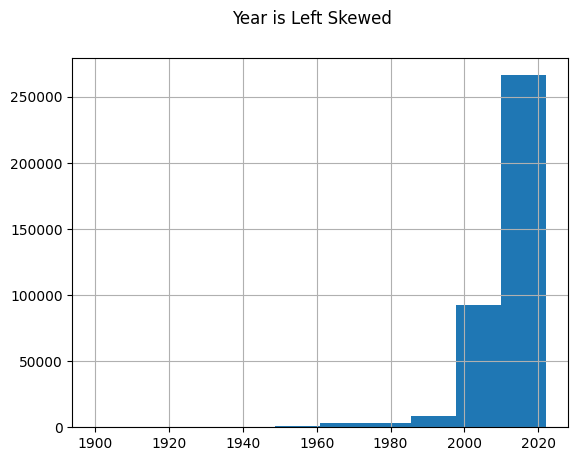

In [18]:
import pylab as pl
cars_clean['year'].hist()
pl.suptitle("Year is Left Skewed")


Text(0.5, 0.98, 'Price is Right Skewed with Outliers')

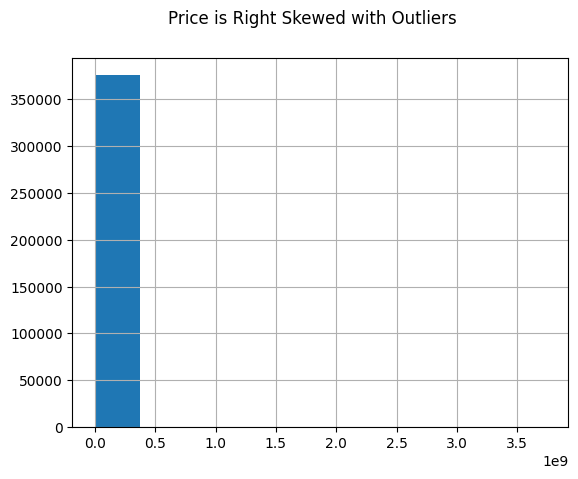

In [19]:
import seaborn as sns
#sns.displot(cars_clean['price'],bins=30,color='purple');
cars_clean['price'].hist()
pl.suptitle("Price is Right Skewed with Outliers")


Text(0.5, 0.98, 'Odometer is Right Skewed with Outliers')

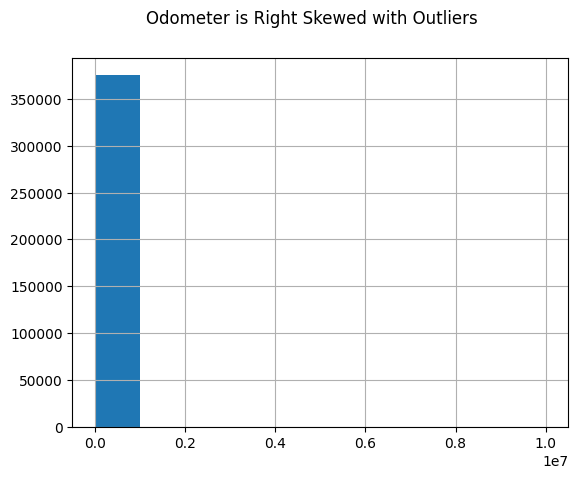

In [20]:
cars_clean['odometer'].hist()
pl.suptitle("Odometer is Right Skewed with Outliers")

In [21]:
# remove outliers...

std = cars_clean['price'].std() 
mean = cars_clean['price'].mean()

print(std, mean)

cars_clean[cars_clean['price']>150000].count()

12983816.664632505 83781.4214669652


price           136
year            136
manufacturer    136
condition       136
cylinders       136
fuel            136
odometer        136
title_status    136
transmission    136
drive           136
size            136
type            136
paint_color     136
state           136
dtype: int64

In [22]:
#standard deviation of price is too high at 13_234_267
# only 126 car above $150_000, so drop them
cars_clean = cars_clean[cars_clean['price']<=150000]

In [23]:
std = cars_clean['year'].std() 
mean = cars_clean['year'].mean()

print(std, mean)

cars_clean = cars_clean[cars_clean['year']>= mean-2*std]
cars_clean = cars_clean[cars_clean['year']<= mean+2*std]

9.106543021291875 2011.2896456031299


In [24]:
std = cars_clean['odometer'].std() 
mean = cars_clean['odometer'].mean()

print(std, mean)

cars_clean = cars_clean[cars_clean['odometer']<= mean+2*std]



136137.2714291103 95374.98032134373


Text(0.5, 1.0, 'Odometer: Right-Skewed after Outlier Removal')

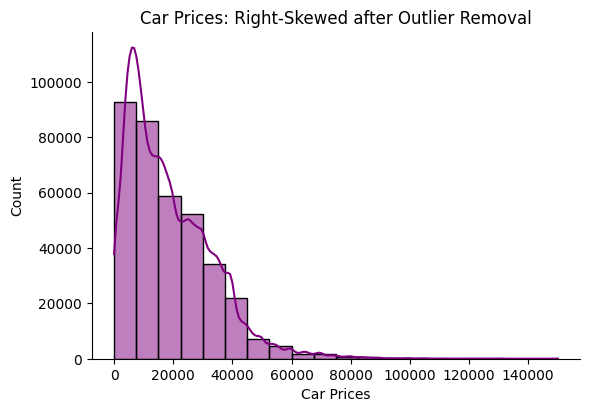

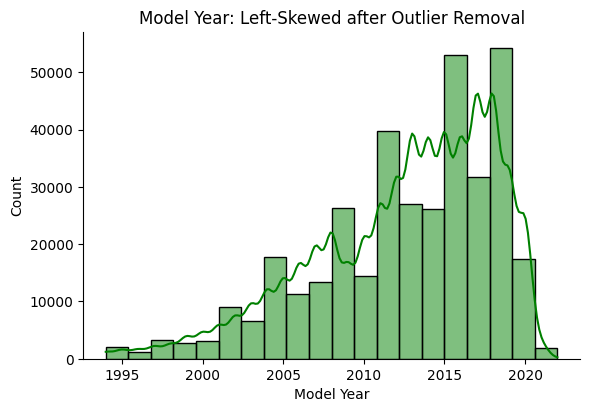

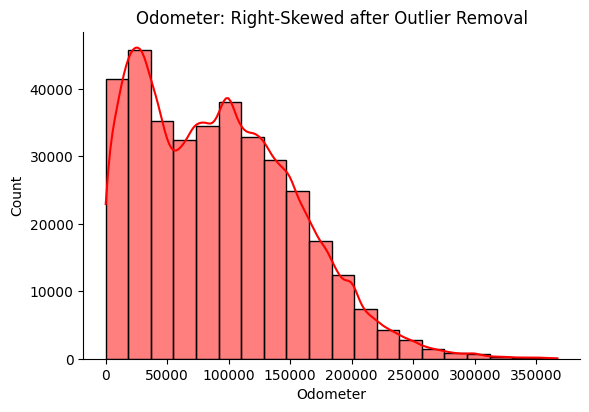

In [25]:
sns.displot(cars_clean['price'], bins=20, color='purple', kde=True, height=4, aspect=1.5)
plt.xlabel("Car Prices")
plt.title("Car Prices: Right-Skewed after Outlier Removal")

sns.displot(cars_clean['year'],bins=20,color='green', kde=True, height=4, aspect=1.5)
plt.xlabel("Model Year")
plt.title("Model Year: Left-Skewed after Outlier Removal")

sns.displot(cars_clean['odometer'],bins=20,color='red', kde=True, height=4, aspect=1.5)
plt.xlabel("Odometer")
plt.title("Odometer: Right-Skewed after Outlier Removal")


In [26]:
cars_clean.describe()

price           year       odometer
count  362489.000000  362489.000000  362489.000000
mean    18959.783822    2012.527354   92395.729721
std     14629.989264       5.550625   62428.112220
min         1.000000    1994.000000       0.000000
25%      7499.000000    2009.000000   38360.000000
50%     15800.000000    2014.000000   87445.000000
75%     27977.000000    2017.000000  135092.000000
max    150000.000000    2022.000000  367245.000000

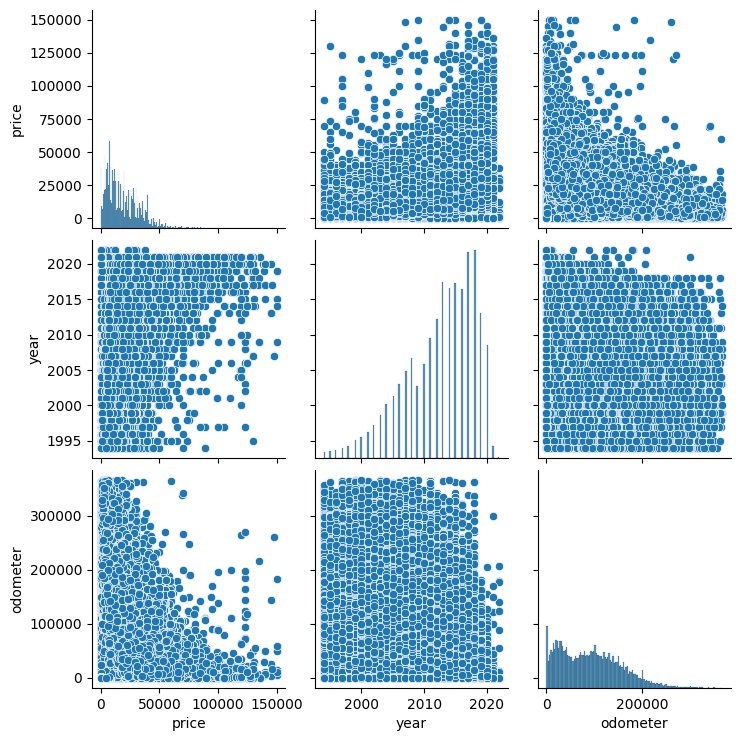

In [27]:
sns.pairplot(cars_clean)

In [28]:
corr=cars_clean.corr(numeric_only=True)

<Axes: >

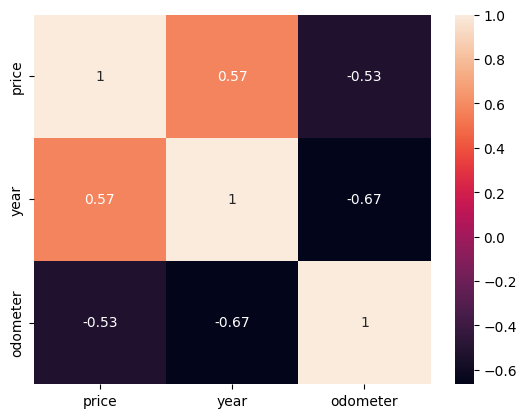

In [29]:
sns.heatmap(corr, annot=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
import plotly.express as px
import warnings


def root_mean_squared_error (y_actual, y_predicted, sq=False):
    return mean_squared_error(y_actual, y_predicted, squared=sq)

In [31]:
X = cars_clean.drop('price', axis = 1)

#drop all categorical columns to get base line error
X = X.drop(['manufacturer', 'fuel','title_status','transmission','state', 'condition', 'drive', 'type', 'cylinders', 
            'paint_color', 'size'], axis=1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [32]:
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [33]:
pipe.fit(X_train, y_train)

preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

base_train_mse = root_mean_squared_error(y_train, preds_train)
base_test_mse = root_mean_squared_error(y_test, preds_test)

In [34]:
print('Baseline Train LinReg RMSE: ', base_train_mse)
print('Baseline Test LinReg RMSE:  ', base_test_mse)

Baseline Train LinReg RMSE:  11587.46765706822
Baseline Test LinReg RMSE:   11571.719769880938


In [35]:
# encode categorized columns, normalize, scale, feature select, and linreg:

col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'fuel','title_status',
                                                                               'transmission','state', 'condition', 
                                                                               'drive', 'type', 'cylinders', 'paint_color', 
                                                                               'size']), 
                                          remainder='passthrough')


pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Lasso(alpha=0.5, tol=1e-2))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Lasso(alpha=0.5, tol=0.01))])

In [36]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

lasso_preds_train = pipe.predict(X_train)
lasso_preds_test = pipe.predict(X_test)

lasso_train_mse = root_mean_squared_error(y_train, lasso_preds_train)
lasso_test_mse = root_mean_squared_error(y_test, lasso_preds_test)

print('Train Lasso RMSE: ', lasso_train_mse)
print('Test Lasso RMSE:  ', lasso_test_mse)

Train Lasso RMSE:  8678.452698075425
Test Lasso RMSE:   8639.4286156631


In [37]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Ridge(alpha=0.5))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

In [38]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

ridge_preds_train = pipe.predict(X_train)
ridge_preds_test = pipe.predict(X_test)

ridge_train_mse = root_mean_squared_error(y_train, ridge_preds_train)
ridge_test_mse = root_mean_squared_error(y_test, ridge_preds_test)

print('Train Ridge RMSE: ', ridge_train_mse)
print('Test Ridge RMSE:  ', ridge_test_mse)

Train Ridge RMSE:  8673.533347394692
Test Ridge RMSE:   8635.130463178994


In [39]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [40]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

linreg_preds_train = pipe.predict(X_train)
linreg_preds_test = pipe.predict(X_test)

linreg_train_mse = root_mean_squared_error(y_train, linreg_preds_train)
linreg_test_mse = root_mean_squared_error(y_test, linreg_preds_test)

print('Train LinReg RMSE: ', linreg_train_mse)
print('Test LinReg RMSE:  ', linreg_test_mse)

Train LinReg RMSE:  8676.46785257831
Test LinReg RMSE:   8637.29577619869


In [41]:
new_df = X_train.drop(['year', 'manufacturer', 'condition', 'fuel', 'odometer', 'title_status','transmission', 'drive', 'size', 
                       'type', 'paint_color', 'state', 'cylinders'], axis=1)
new_df['price'] = y_train
new_df['Lasso'] = lasso_preds_train
new_df['Ridge'] = ridge_preds_train
new_df['LinReg'] = linreg_preds_train

In [42]:
new_df.head(10)

price         Lasso         Ridge        LinReg
50306   14995  14587.502920  14661.409039  14610.996707
324563    194  13012.131634  13096.908843  13044.858600
300637   8995   4756.124952   4674.628750   4796.312059
2534    39590  41933.270065  41798.459143  41779.244992
149410  18475  24805.847206  24870.312503  24893.958609
202292   8997  10593.138842  10635.513375  10580.676880
73759   17990  15488.407830  15378.801431  15453.920682
56455   13500  14680.684966  14597.892863  14717.188483
384657  29590  28095.302223  28168.665105  28111.930049
124783  14590  19367.970198  19442.707607  19406.003937

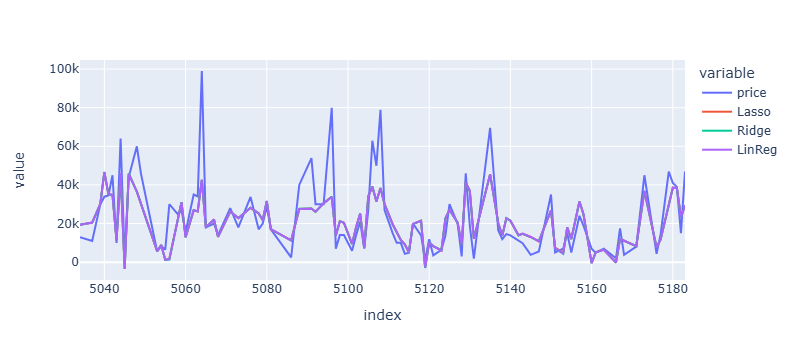

In [43]:
new_df.sort_index()[3000:3100].plot(kind='line', backend='plotly')

In [44]:
new_df = pd.DataFrame()
new_df['price'] = y_test
new_df['Lasso'] = ridge_preds_test
new_df['Ridge'] = ridge_preds_test
new_df['LinReg'] = linreg_preds_test

In [45]:
new_df.head(10)

price         Lasso         Ridge        LinReg
125846  19491  18997.593569  18997.593569  19041.535316
411514   8000  12064.219420  12064.219420  11977.769952
363672  30495  25585.650822  25585.650822  25543.730939
262952  29990  32730.832963  32730.832963  32675.130091
192672  28995  19062.668096  19062.668096  19064.666778
270239  32590  26023.516338  26023.516338  26080.477051
99348    9499   7708.736756   7708.736756   7816.350265
185160  32590  28534.871478  28534.871478  28466.177775
254285   4300   4940.874591   4940.874591   4847.289748
196767   6000  19716.736898  19716.736898  19610.241389

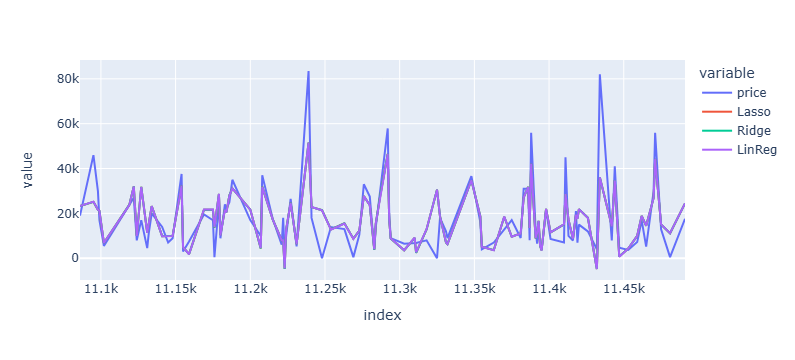

In [46]:
new_df.sort_index()[3000:3100].plot(kind='line', backend='plotly')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [47]:
# Best Features:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=10)),
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [ ]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

feat_preds_train = pipe.predict(X_train)
feat_preds_test = pipe.predict(X_test)

feat_train_mse = root_mean_squared_error(y_train, feat_preds_train)
feat_test_mse = root_mean_squared_error(y_test, feat_preds_test)

print('Train LinReg Best 4 Features RMSE: ', feat_train_mse)
print('Test LinReg Best 4 Features RMSE:  ', feat_test_mse)

In [ ]:
features = pipe.named_steps['col_transformer'].get_feature_names_out()
sel_features = pipe.named_steps['selector'].get_feature_names_out()
indexes = []
for s in sel_features:
    indexes.append(int(s[1:]))

features[indexes]

In [ ]:
pipe = Pipeline([
                ('col_transformer', col_transformer), 
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)), 
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', LinearRegression())])

pipe

In [ ]:
X = cars_clean.drop('price', axis = 1)

y = cars_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

param_dict = {'selector__n_features_to_select': [4, 5, 6, 7, 8, 9, 10]}
             #'model__alpha': [0.1, 0.2, 0.4, 0.5, 0.7, 0.9]}

mygrid = GridSearchCV(estimator = pipe, param_grid=param_dict)
mygrid.fit(X_train,y_train)

grid_preds_train = mygrid.predict(X_train)
grid_preds_test = mygrid.predict(X_test)

grid_train_mse = root_mean_squared_error(y_train, grid_preds_train)
grid_test_mse = root_mean_squared_error(y_test, grid_preds_test)

print('Train GridSearch RMSE: ', grid_train_mse)
print('Test GridSearch RMSE:  ', grid_test_mse)

In [ ]:
best_selector = mygrid.best_estimator_.named_steps['selector']
best_selector.get_support()
pipe.named_steps['col_transformer'].get_feature_names_out()[best_selector.get_support()]

In [ ]:
mygrid.best_estimator_

In [ ]:
mygrid.best_estimator_.named_steps['model'].coef_

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

"""
Re-evaluating the Modeling Approach Based on Initial Findings
Initial model development utilizing a GridSearchCV pipeline with Lasso regression, configured for automatic feature selection between 4 and 10 features, yielded consistent results across various iterations. An analysis of the regression coefficients indicated that newer model year, lower odometer readings, and a clean title are consistently the most significant positive predictors of vehicle value in a general market context.

However, the models also demonstrated a counterintuitive penalization of 4-cylinder engines and front-wheel drive (FWD). This finding suggests a disconnect with our current business understanding of the car dealership's specific market dynamics and preferences.

In accordance with the CRISP-DM Process Model, this necessitates a return to the initial "Business Understanding" phase to refine our problem definition. Upon reviewing the type categorical feature, it is evident that SUVs, Sedans, and Pickups represent the predominant vehicle types within our dataset.

To improve the fidelity and relevance of our machine learning models, a revised strategy has been adopted: the data will be segmented into these three primary vehicle categories, and separate modeling pipelines will be developed and executed for each segment. Furthermore, during the data cleaning process for these segmented datasets, a decision was made to truncate only older model years, retaining all more recent vehicle years to ensure relevance.
"""